In [1]:
from diffeq import BoundaryProblem
from config import BOUNDARY_CONDITIONS
import visualize

%matplotlib inline

# Крайова задача

Необхідно розв'язати крайову задачу, що задана для дифереційного рівняння Лапласа:
$$\frac{\partial^2 T}{\partial x^2} + \frac{\partial^2 T}{\partial y^2} = 0$$
На інтервалі $x \in [0; 4], y \in [0; 4]$, з заданими граничними умовами.

In [2]:
boundary_problem = BoundaryProblem(boundary_conditions=BOUNDARY_CONDITIONS, 
                                   change_interval=(5.0, 5.0),
                                   amount_of_sections=(5, 5))

Для розв'язку задачі використаємо метод сіток. Тобто, знайдемо значенні функціх не на всій області, а лише в деяких точках, що зазначені розбиттям.

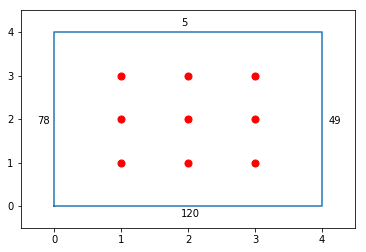

In [3]:
visualize.plate(BOUNDARY_CONDITIONS)

Для вирішення даної задачі, зводимо диференційне рівняння до різнецевого

$$\frac{\partial^2 T}{\partial x^2} = \frac {T(x - h_1, y) - 2 T(x, y) + T(x + h_1, y)} {h_1^2}$$

$$\frac{\partial^2 T}{\partial y^2} = \frac {T(x, y - h_2) - 2 T(x, y) + T(x, y + h_2)} {h_2^2}$$

Тобто, маємо рівняння виду

$$\frac {T(x - h_1, y) - 2 T(x, y) + T(x + h_1, y)} {h_1^2} +  \frac {T(x, y - h_2) - 2 T(x, y) + T(x, y + h_2)} {h_2^2} = 0$$

На основі якого, та значень краєвих умов, знаходимо значення функції у зазначених вузлах.

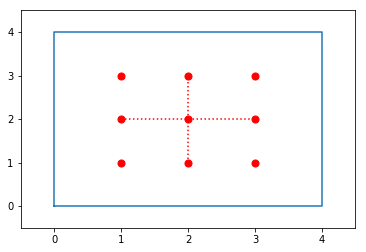

In [4]:
visualize.difference_scheme()

In [5]:
answer = boundary_problem.solve(method="grid", disp=True)

Input data
	Temperature on
		upper edge: 5
		right edge: 49
		lower edge: 120
		left edge: 78
Computational data
	Step size
		by X axis: 1.0
		by Y axis: 1.0
	Amount of equations: 21



In [6]:
answer

array([[ 47.64,  38.23,  37.29],
       [ 69.34,  63.  ,  56.91],
       [ 88.71,  87.52,  78.36]])

Тобто, розподіл температур має вигляд

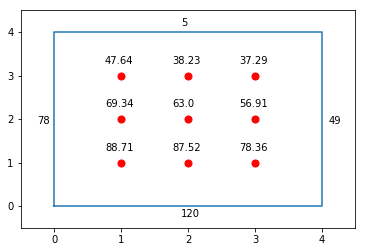

In [7]:
visualize.marked_plate(answer, BOUNDARY_CONDITIONS)

Перевіримо правильність реалізації алгоритму. Для цього підставимо дані нам тестові данні, та порівняємо отримані результати з тим що має бути.

In [8]:
BoundaryProblem.is_valid(disp=True)

RUN METHOD WITH TEST DATA

Input data
	Temperature on
		upper edge: 100
		right edge: 50
		lower edge: 0
		left edge: 75
Computational data
	Step size
		by X axis: 1
		by Y axis: 1
	Amount of equations: 21

EXPECTED RESULT
[[ 78.59  76.06  69.71]
 [ 63.21  56.11  52.34]
 [ 43.    33.3   33.89]]
ACTUAL RESULT
[[ 78.57  76.12  69.64]
 [ 63.17  56.25  52.46]
 [ 42.86  33.26  33.93]]




True